Рассмотрим начально-краевую задачу для одномерного уравнения теплопроводности:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial t^2}
$$


c краевыми условиями $(0 \leqslant x \leqslant 1)$

$$
u(0, t) = u(1, t) = 0
$$

и начальным условием

$$
u(x, 0) = \sin{\pi x} + \sin{3\pi x} \;.
$$

Требуется написать программу, строящую решение в области $0 \leqslant x \leqslant 1$ и $t \geqslant 0$ с использованием конечно-разностной схемы (схему выбираете самостоятельно, но не чисто явную схемы на четырехтотечном шаблоне).
Решение визуализировать, сравнить с точным решением.
Обосновать выбор конечно-разностной схемы, указать условия устойчивости и порядок сходимости.

Решение: $u(x,t) = sin(\pi x) e^{- \pi^2 t} + sin(3 \pi x) e^{- 9 \pi^2 t} $  
Порядок устойчивости: $O(\tau+h^2)$  
Условия устойчивости: $\tau \le h^2/2$  
P.S прикреплен рядом pdf c решением

In [5]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from importlib import reload
reload(plt)
%matplotlib notebook

In [2]:
def solve_explicitly(tau, h, T, u0):
    K = math.ceil(1 / h) + 1;
    N = math.ceil(T / tau) + 1;
    
    y = np.zeros(shape=(N, K))
    x0 = np.array([j * h  for j in np.arange(1, K-1)])
    y[0,1:K-1] = u0(x0)
    
    for n in np.arange(1,N):
        for i in np.arange(1,K-1):
            y[n, i] = y[n - 1, i] + tau * (y[n - 1, i + 1] - 2 * y[n - 1, i] + y[n - 1, i - 1]) / h / h
    
    return y

def plot(y, u, tau, h, title):
    K = y.shape[1]
    N = y.shape[0]
    X = np.array([i * h  for i in np.arange(K)])
    T = np.array([n * tau for n in np.arange(N)])
    XX, YY = np.meshgrid(X, T)

    Z = u(XX, YY)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(XX, YY, Z)
    ax.scatter3D(XX, YY, y, c='Red', s=1);
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('z')
    ax.set_title(title);

<IPython.core.display.Javascript object>


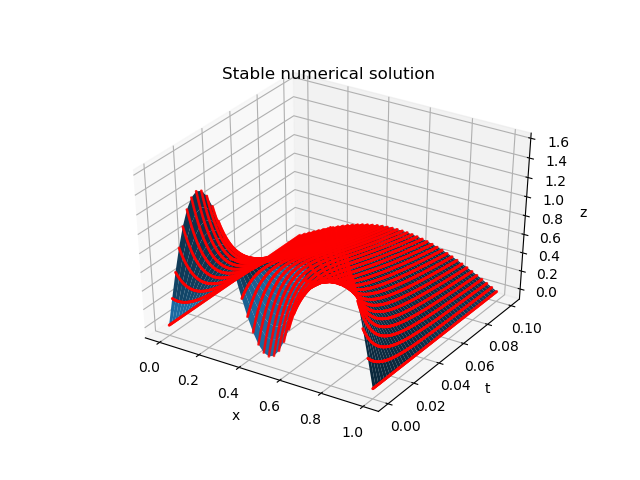

In [6]:
def u(x, t):
    return np.sin(math.pi * x)*np.exp(-math.pi *math.pi * t) + np.sin(3 * math.pi * x)*np.exp(-9 *math.pi * math.pi * t)

def u0(x):
    return np.sin(math.pi * x) + np.sin(3 * math.pi * x)

tau = 0.0002
h = 0.025
T = 0.1;

# the stability condition
assert(tau <= (h * h / 2))

y = solve_explicitly(tau, h, T, u0)
plot(y, u, tau, h, "Stable numerical solution")
# plot is interacitve

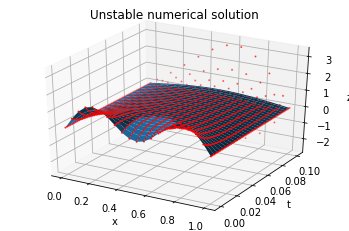

In [4]:
# посмотрим на пример неустойчивой явной схемы
tau = 0.0019
h = 0.05
T = 0.1;

# the unstability condition
assert(tau >= (h * h / 2))

y = solve_explicitly(tau, h, T, u0)
plot(y, u, tau, h, "Unstable numerical solution")